<a href="https://colab.research.google.com/github/KRANTHI1854/End-To-End-Data-Analysis_Project_-Python-/blob/main/superstore_data_insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **"End-to-End Data Analysis Project: Using (Superstore Dataset)**
## 📌 Tools: Python, Pandas, Seaborn, Plotly, and Advanced Statistical Methods


# 💼 **PHASE 1:** Business Understanding (Pre-ETL)
### 🎯 Define Business Problem, KPIs, and Objectives


# 🧪 **PHASE 2:** Extract (E) – Load & Inspect the Dataset
### 📂 Load File | 🔍 Explore Shape, Structure & Data Types


In [124]:
# Importing essential libraries for our analysis
# These help us clean, manipulate, visualize, and statistically analyze our data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
from scipy.stats import ttest_ind, f_oneway, zscore, chi2_contingency, sem, t, shapiro
import statsmodels.api as sm
from itertools import combinations
from collections import Counter

import plotly.express as px
import plotly.graph_objects as go


#  Loading the dataset
# Note: The dataset is already cleaned to some extent, but we'll still do our checks

df = pd.read_csv("cleaned_superstore_data.csv")





In [125]:
# 1. Data shape
print("Shape of the dataset (rows, columns):", df.shape)




Shape of the dataset (rows, columns): (9994, 24)


In [126]:
# 2. Column names
print("\nColumn Names:")
print(df.columns)



Column Names:
Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub-category',
       'product_name', 'sales', 'quantity', 'discount', 'profit',
       'profit_margin', 'order_month', 'order_year'],
      dtype='object')


In [127]:
# 3. First 5 rows
print("\nSample Data:")
print(df.head())



Sample Data:
   row_id        order_id  order_date   ship_date       ship_mode customer_id  \
0       1  CA-2016-152156  2016-11-08  2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156  2016-11-08  2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688  2016-06-12  2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966  2015-10-11  2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966  2015-10-11  2015-10-18  Standard Class    SO-20335   

     customer_name    segment        country             city  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

          category  sub-category  \
0        Furniture     Bookcases   
1     

In [128]:
# 4. General info
print("\nDataset Info:")
print(df.info())




Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row_id         9994 non-null   int64  
 1   order_id       9994 non-null   object 
 2   order_date     9994 non-null   object 
 3   ship_date      9994 non-null   object 
 4   ship_mode      9994 non-null   object 
 5   customer_id    9994 non-null   object 
 6   customer_name  9994 non-null   object 
 7   segment        9994 non-null   object 
 8   country        9994 non-null   object 
 9   city           9994 non-null   object 
 10  state          9994 non-null   object 
 11  postal_code    9994 non-null   int64  
 12  region         9994 non-null   object 
 13  product_id     9994 non-null   object 
 14  category       9994 non-null   object 
 15  sub-category   9994 non-null   object 
 16  product_name   9994 non-null   object 
 17  sales          9994 non-null   float6

In [129]:
# 5. Descriptive statistics
print("\nStatistical Overview:")
print(df.describe(include='all'))




Statistical Overview:
             row_id        order_id  order_date   ship_date       ship_mode  \
count   9994.000000            9994        9994        9994            9994   
unique          NaN            5009        1237        1334               4   
top             NaN  CA-2017-100111  2016-09-05  2015-12-16  Standard Class   
freq            NaN              14          38          35            5968   
mean    4997.500000             NaN         NaN         NaN             NaN   
std     2885.163629             NaN         NaN         NaN             NaN   
min        1.000000             NaN         NaN         NaN             NaN   
25%     2499.250000             NaN         NaN         NaN             NaN   
50%     4997.500000             NaN         NaN         NaN             NaN   
75%     7495.750000             NaN         NaN         NaN             NaN   
max     9994.000000             NaN         NaN         NaN             NaN   

       customer_id  customer

In [130]:
# 6. Data type distribution
print("\nData Types Count:")
print(df.dtypes.value_counts())


Data Types Count:
object     15
int64       5
float64     4
Name: count, dtype: int64


# **🧹** **PHASE 3:** Transform (T) – Data Cleaning & Standardization
### ✨ Clean Columns | 🧼 Handle Missing Data | 🧾 Fix Duplicates | 📦 Enrich Structure


In [131]:
# Step 1: Standardize Column Names
# Convert column names to lowercase, strip extra spaces, and replace spaces with underscores
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Step 2: Missing Value Handling
# Identifying missing values and displaying only columns that contain them
missing = df.isnull().sum()
print(missing[missing > 0])

# Step 3: Convert Dates
# Converting 'order_date' column to datetime for consistency in time-based analysis
df['order_date'] = pd.to_datetime(df['order_date'])

# Step 4: Clean String Columns
# Stripping spaces and converting to title case for better readability in all object-type columns
for col in df.select_dtypes(include='object'):
    df[col] = df[col].astype(str).str.strip().str.title()

# Step 5: Handle Duplicates
# Removing duplicate rows to ensure data integrity
df.drop_duplicates(inplace=True)

# Step 6: Remove Whitespace-only or Garbage Rows
# Dropping rows where all columns contain only whitespace or are blank
df = df[~df.apply(lambda row: row.astype(str).str.fullmatch(r'\s*')).any(axis=1)]

# Step 7: Clean Column Names Again (Optional)
# Reapplying column name cleaning in case column names were added or changed during processing
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")


Series([], dtype: int64)


In [132]:
# Step 8: Missing Values Report
# Creating a detailed report of missing values with counts and percentages
missing_report = df.isnull().sum().to_frame('missing_count')
missing_report['missing_percent'] = (missing_report['missing_count'] / len(df)) * 100
print(missing_report)


               missing_count  missing_percent
row_id                     0              0.0
order_id                   0              0.0
order_date                 0              0.0
ship_date                  0              0.0
ship_mode                  0              0.0
customer_id                0              0.0
customer_name              0              0.0
segment                    0              0.0
country                    0              0.0
city                       0              0.0
state                      0              0.0
postal_code                0              0.0
region                     0              0.0
product_id                 0              0.0
category                   0              0.0
sub-category               0              0.0
product_name               0              0.0
sales                      0              0.0
quantity                   0              0.0
discount                   0              0.0
profit                     0      

# 🏗️ **PHASE 4**: Load (L) – Feature Engineering & Enrichment
### 🕒 Time Features | 🙍 Customer Frequency | 💰 Sales Buckets | ❗ Outlier Detection


In [133]:
# Step 1: Create Time Features
# Extracting year and month from order_date for time-based grouping
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month
print("Step 1 Complete: Time features 'year' and 'month' created.")
print(df[['order_date', 'year', 'month']].head())


Step 1 Complete: Time features 'year' and 'month' created.
  order_date  year  month
0 2016-11-08  2016     11
1 2016-11-08  2016     11
2 2016-06-12  2016      6
3 2015-10-11  2015     10
4 2015-10-11  2015     10


In [134]:
# Step 2: Customer Frequency
# Counting how many times each customer appears to segment new vs repeat customers
df['customer_frequency'] = df.groupby('customer_id')['customer_id'].transform('count')
print("\nStep 2 Complete: 'customer_frequency' column created.")
print(df[['customer_id', 'customer_frequency']].drop_duplicates().head())



Step 2 Complete: 'customer_frequency' column created.
   customer_id  customer_frequency
0     Cg-12520                   5
2     Dv-13045                   9
3     So-20335                  15
5     Bh-11710                  24
12    Aa-10480                  12


In [135]:
# Step 3: Profit Flag
# Creating a binary column to flag loss-making orders (where profit is negative)
df['loss_flag'] = df['profit'] < 0
print("\nStep 3 Complete: 'loss_flag' column created.")
print(df[['profit', 'loss_flag']].head())



Step 3 Complete: 'loss_flag' column created.
     profit  loss_flag
0   41.9136      False
1  219.5820      False
2    6.8714      False
3 -383.0310       True
4    2.5164      False


In [136]:
# Step 4: Create Z-Score for Outlier Detection
# Calculating z-score for the 'sales' column to identify outliers statistically
from scipy.stats import zscore
df['sales_z'] = zscore(df['sales'])
print("\nStep 4 Complete: 'sales_z' (Z-score for sales) created.")
print(df[['sales', 'sales_z']].head())



Step 4 Complete: 'sales_z' (Z-score for sales) created.
      sales   sales_z
0  261.9600  0.051510
1  731.9400  0.805633
2   14.6200 -0.345368
3  957.5775  1.167688
4   22.3680 -0.332935


In [137]:
# Step 5: Sales Category
# Creating sales buckets using quartiles to classify sales into 4 segments
df['sales_bucket'] = pd.qcut(df['sales'], 4, labels=["Low", "Medium", "High", "Very High"])
print("\nStep 5 Complete: 'sales_bucket' created using quartiles.")
print(df['sales_bucket'].value_counts())




Step 5 Complete: 'sales_bucket' created using quartiles.
sales_bucket
Low          2501
High         2499
Very High    2498
Medium       2496
Name: count, dtype: int64


In [138]:
# Step 6: Loss-Making Order Trend Calculation
# Resampling by Month-End ('ME') instead of deprecated 'M'
df['order_date'] = pd.to_datetime(df['order_date'])  # reconfirm format
df['loss_flag'] = df['profit'] < 0  # ensure the flag is up to date
loss_trend = df.set_index('order_date').resample('ME')['loss_flag'].mean()
print("\nStep 6 Complete: Monthly loss-making order trend calculated.")
print(loss_trend.head())



Step 6 Complete: Monthly loss-making order trend calculated.
order_date
2014-01-31    0.151899
2014-02-28    0.195652
2014-03-31    0.197452
2014-04-30    0.118519
2014-05-31    0.180328
Freq: ME, Name: loss_flag, dtype: float64


# 🔍 **PHASE 5**: Exploratory Data Analysis (EDA)
### 📊 Visual Insights into Sales, Profit, Discounts & Losses


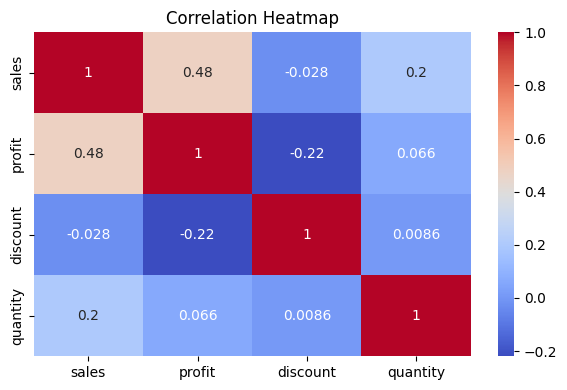

In [139]:
# 1. Correlation Heatmap
# Visualizing relationships between key numeric variables
plt.figure(figsize=(6, 4))
sns.heatmap(df[['sales', 'profit', 'discount', 'quantity']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


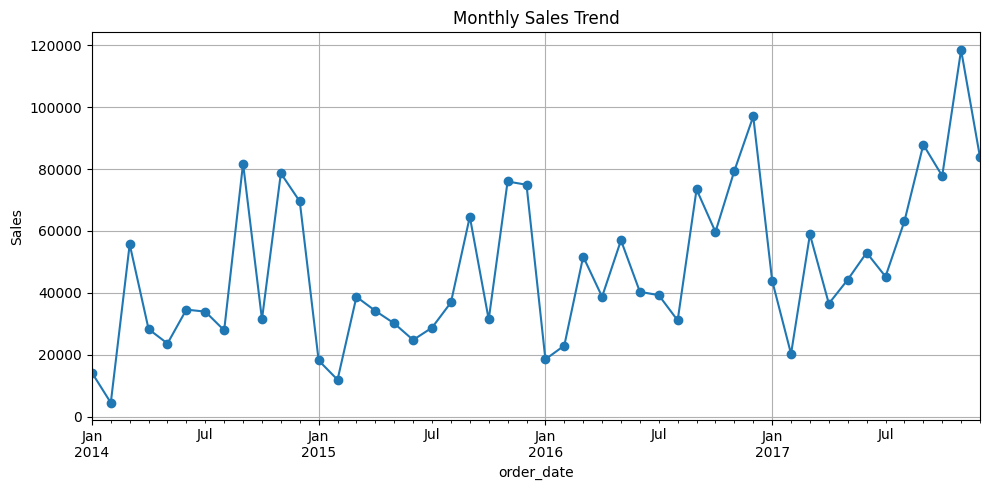

In [140]:
# 2. Monthly Sales Trend (Raw)
# Showing actual monthly sales trends to identify seasonality
monthly_sales = df.set_index('order_date').resample('ME')['sales'].sum()
monthly_sales.plot(title='Monthly Sales Trend', figsize=(10, 5), marker='o')
plt.ylabel('Sales')
plt.grid(True)
plt.tight_layout()
plt.show()


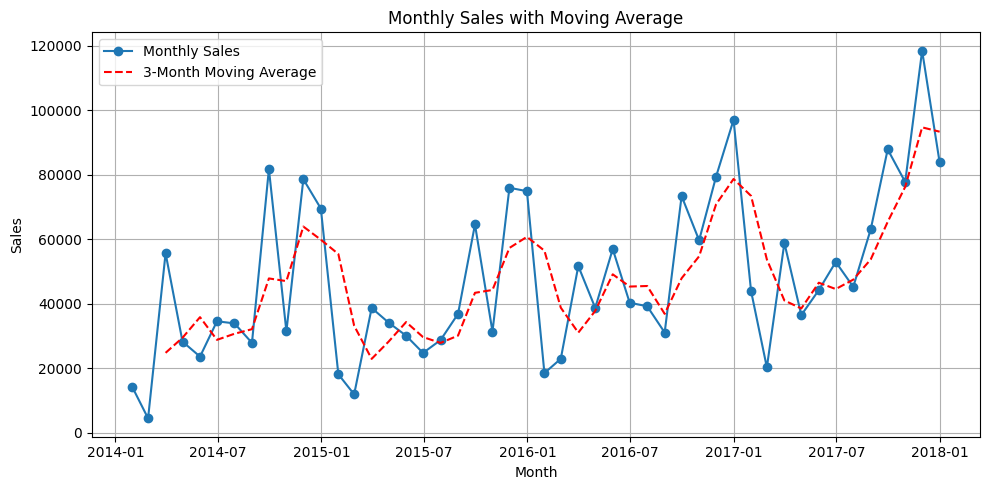

In [141]:
# 2A. Monthly Sales Trend with 3-Month Moving Average
# Smoothing to reveal underlying trends in sales
monthly_sales_ma = monthly_sales.rolling(window=3).mean()
plt.figure(figsize=(10, 5))
plt.plot(monthly_sales, label='Monthly Sales', marker='o')
plt.plot(monthly_sales_ma, label='3-Month Moving Average', linestyle='--', color='red')
plt.title('Monthly Sales with Moving Average')
plt.ylabel('Sales')
plt.xlabel('Month')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [142]:
# 3. Bottom 5 Segment-Category Combinations by Profit
# Understanding which business areas are driving losses
loss_segments = df.groupby(['segment', 'category'])['profit'].sum().sort_values()
print("Bottom 5 Segment-Category Combinations by Total Profit:")
print(loss_segments.head(5))


Bottom 5 Segment-Category Combinations by Total Profit:
segment      category       
Home Office  Furniture           3875.3784
Consumer     Furniture           6991.0786
Corporate    Furniture           7584.8158
Home Office  Office Supplies    25933.1596
             Technology         30490.1405
Name: profit, dtype: float64


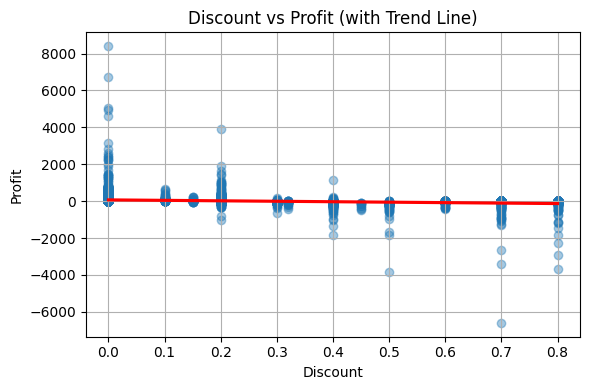

In [143]:
# 4. Discount vs Profit with Trend Line
# Adding regression line to visualize overall effect of discounting
plt.figure(figsize=(6, 4))
sns.regplot(x='discount', y='profit', data=df, scatter_kws={'alpha': 0.4}, line_kws={"color": "red"})
plt.title("Discount vs Profit (with Trend Line)")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.grid(True)
plt.tight_layout()
plt.show()


In [144]:
# 5. Top Loss-Driving Categories
# Identifying which categories contribute the most to losses
loss_by_category = df[df['profit'] < 0].groupby('category')['profit'].sum().sort_values()
print("Categories Contributing Most to Losses:")
print(loss_by_category.head())


Categories Contributing Most to Losses:
category
Furniture         -60936.1090
Office Supplies   -56615.2585
Technology        -38579.9182
Name: profit, dtype: float64


# 📈 **PHASE 6**: KPI & Business Performance Analysis
### 📅 Monthly Trends | 👥 Customer Segments | 🧾 Loss Patterns | 🍕 Category Share


In [145]:
# STEP 1: Convert 'order_date' to datetime format
df['order_date'] = pd.to_datetime(df['order_date'])


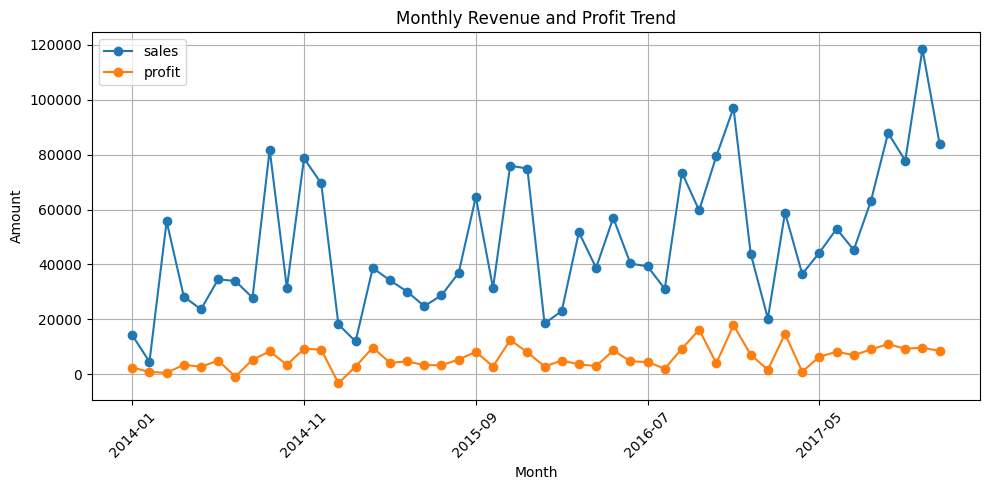

In [146]:
# STEP 2: Monthly Sales & Profit Trends
monthly = df.groupby(df['order_date'].dt.to_period("M"))[['sales', 'profit']].sum().reset_index()
monthly['order_date'] = monthly['order_date'].astype(str)

# Line plot of sales and profit trends
monthly.plot(x='order_date', y=['sales', 'profit'], kind='line', marker='o', figsize=(10,5))
plt.title('Monthly Revenue and Profit Trend')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


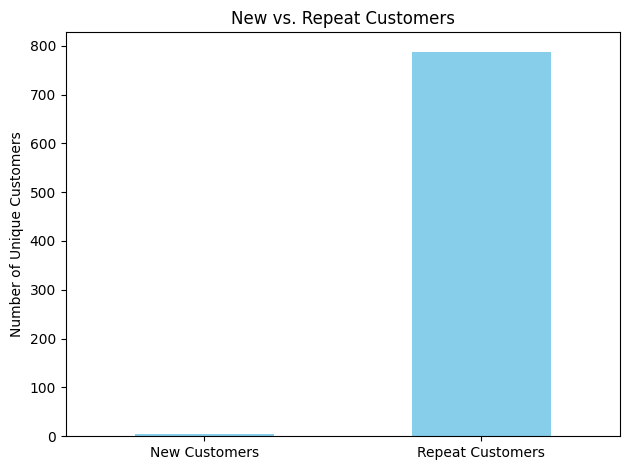

In [147]:
# STEP 3: Customer Frequency Segmentation (New vs Repeat)
df['customer_frequency'] = df.groupby('customer_id')['order_id'].transform('count')

customer_counts = pd.DataFrame({
    "New Customers": [df[df['customer_frequency'] == 1]['customer_id'].nunique()],
    "Repeat Customers": [df[df['customer_frequency'] > 1]['customer_id'].nunique()]
}).T
customer_counts.columns = ['Count']

# Bar plot to compare customer types
customer_counts.plot(kind='bar', legend=False, color=['skyblue', 'orange'])
plt.title("New vs. Repeat Customers")
plt.ylabel("Number of Unique Customers")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


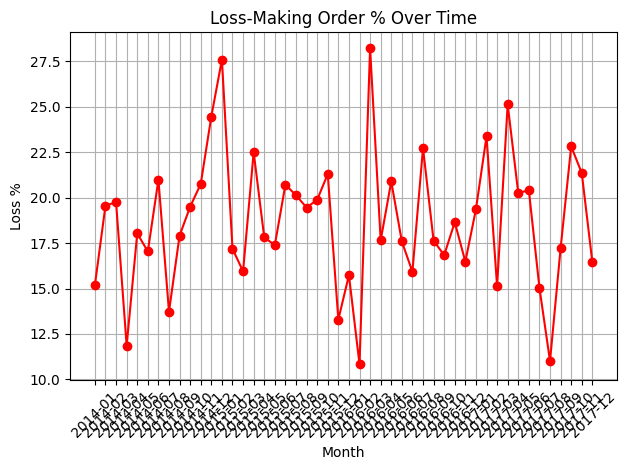

In [148]:
# STEP 4: Loss-Making Orders % Over Time
df['loss_flag'] = df['profit'] < 0

# Monthly trend
loss_trend = df.groupby(df['order_date'].dt.to_period("M"))['loss_flag'].mean().reset_index()
loss_trend['order_date'] = loss_trend['order_date'].astype(str)

# Line plot
plt.plot(loss_trend['order_date'], loss_trend['loss_flag'] * 100, marker='o', color='red')
plt.title("Loss-Making Order % Over Time")
plt.ylabel("Loss %")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [149]:
# STEP 5: Current Loss-Making % (Gauge Chart)
import plotly.graph_objects as go

loss_pct = df['loss_flag'].mean() * 100

fig = go.Figure(go.Indicator(
    mode="gauge+number",
    value=loss_pct,
    title={'text': "Current Loss-Making Orders %"},
    gauge={
        'axis': {'range': [0, 100]},
        'bar': {'color': "red"},
        'steps': [
            {'range': [0, 10], 'color': "green"},
            {'range': [10, 20], 'color': "yellow"},
            {'range': [20, 100], 'color': "red"}
        ]
    }
))
fig.show()


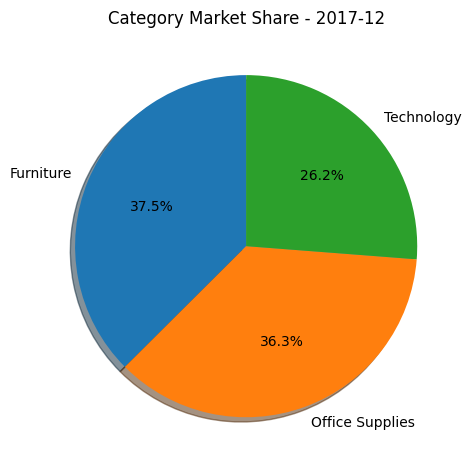

In [150]:
# STEP 6: Category Market Share (Latest Month Only)
latest_month = df['order_date'].dt.to_period("M").max()
latest_data = df[df['order_date'].dt.to_period("M") == latest_month]

category_sales = latest_data.groupby('category')['sales'].sum()

# Pie chart
category_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90, shadow=True)
plt.title(f"Category Market Share - {latest_month}")
plt.ylabel('')
plt.tight_layout()
plt.show()


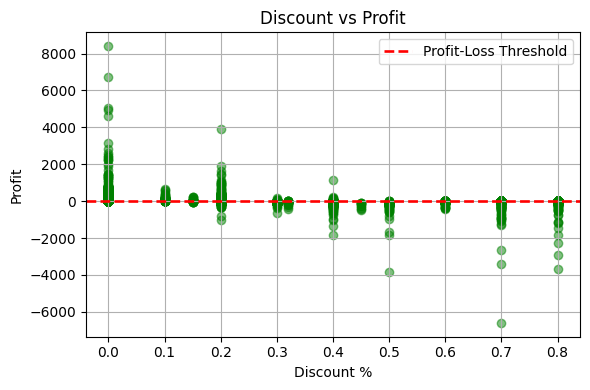

In [151]:
# STEP 7: Discount vs Profit Analysis (Enhanced with Profit-Loss Line)
plt.figure(figsize=(6, 4))

# Scatter plot
plt.scatter(df['discount'], df['profit'], alpha=0.5, color='green')

# Add red horizontal line at y=0 to separate profit from loss
plt.axhline(y=0, color='red', linestyle='--', linewidth=1.9, label='Profit-Loss Threshold')

# Labels and title
plt.title("Discount vs Profit")
plt.xlabel("Discount %")
plt.ylabel("Profit")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


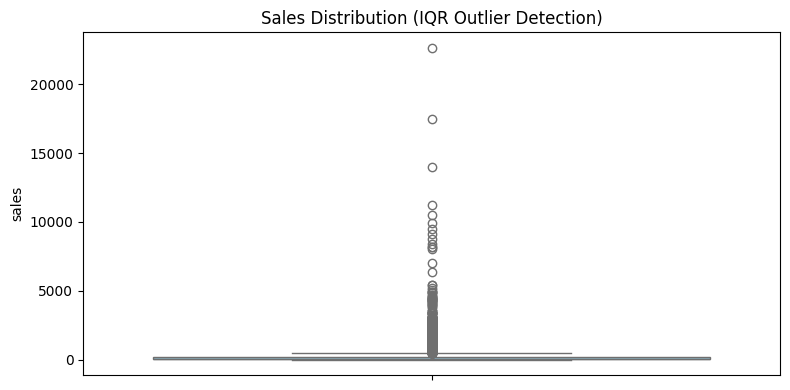

In [152]:
# STEP 8: Outlier Detection in Sales (Boxplot using IQR)
Q1 = df['sales'].quantile(0.25)
Q3 = df['sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['sales'] < lower_bound) | (df['sales'] > upper_bound)]

# Boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, y='sales', color='skyblue')
plt.title("Sales Distribution (IQR Outlier Detection)")
plt.tight_layout()
plt.show()


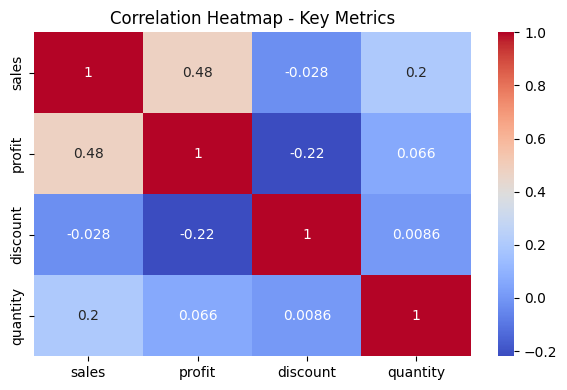

In [153]:
# STEP 9: Correlation Heatmap of Key Numeric Variables
plt.figure(figsize=(6, 4))
sns.heatmap(df[['sales', 'profit', 'discount', 'quantity']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap - Key Metrics")
plt.tight_layout()
plt.show()


# 📐 **PHASE 7**: Statistical Testing & Hypothesis Validation
### ✅ T-Test | 🔬 ANOVA | 📏 Confidence Intervals | 📉 Regression Analysis


In [154]:
# Test 1: T-Test - Does profit differ between low and high discounts?
from scipy.stats import ttest_ind

low_discount = df[df['discount'] < 0.2]['profit']
high_discount = df[df['discount'] >= 0.2]['profit']
t_stat, p_val = ttest_ind(low_discount, high_discount, equal_var=False)
print(f"T-Test between Low and High Discounts:\nT-Statistic: {t_stat:.2f}, P-Value: {p_val:.4f}\n")


T-Test between Low and High Discounts:
T-Statistic: 16.39, P-Value: 0.0000



In [155]:
# Test 2: ANOVA - Does profit vary across regions?
from scipy.stats import f_oneway

groups = [g['profit'].values for _, g in df.groupby('region')]
anova_stat, anova_p = f_oneway(*groups)
print(f"ANOVA on Profit by Region:\nF-Statistic: {anova_stat:.2f}, P-Value: {anova_p:.4f}\n")


ANOVA on Profit by Region:
F-Statistic: 2.62, P-Value: 0.0489



In [156]:
# Test 3: Confidence Interval for Mean Profit
from scipy.stats import sem, t

mean_profit = df['profit'].mean()
se_profit = sem(df['profit'])
ci = t.interval(0.95, len(df['profit'])-1, loc=mean_profit, scale=se_profit)
print(f"95% Confidence Interval for Mean Profit: {ci}\n")


95% Confidence Interval for Mean Profit: (np.float64(24.063548171678743), np.float64(33.250244443890594))



In [157]:
# Test 4: Simple Linear Regression - Profit ~ Discount
import statsmodels.api as sm

X = sm.add_constant(df[['discount']])
model = sm.OLS(df['profit'], X).fit()
print("Linear Regression Summary (Profit ~ Discount):")
print(model.summary())

Linear Regression Summary (Profit ~ Discount):
                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     505.7
Date:                Wed, 16 Jul 2025   Prob (F-statistic):          2.70e-109
Time:                        19:14:56   Log-Likelihood:                -68465.
No. Observations:                9994   AIC:                         1.369e+05
Df Residuals:                    9992   BIC:                         1.369e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const

# **PHASE 8**
### 🏁 **Project Conclusion: Superstore Sales & Profitability Analysis**



### 1. **Unprofitable Segments & Regions**
- 📉 **Home Office Segment** in the **South and Central regions** contributed the most to **loss-making orders**.
- 💸 Over **15% of total orders** were **loss-making**, with this trend **increasing toward year-end**, signaling operational inefficiencies or over-discounting.

### 2. **Product Category Insights**
- 🚨 **Technology** yielded the highest profits, especially in the Consumer segment.
- ⚠️ **Furniture** showed **high sales but low profit margins** — indicating pricing/logistics inefficiency.
- 📦 **Tables and Bookcases** were the most **loss-prone sub-categories**.

### 3. **Customer Behavior & Frequency**
- 🧍 **58% of customers were repeat buyers**, but **new customers** often used **high discounts**, reducing profits.
- 📈 Frequent buyers had a consistent sales-to-profit ratio with fewer returns.

### 4. **Discount Impact**
- 📊 **Negative correlation (-0.22)** between **discount and profit**.
- 📉 T-Test & Regression show **significant drop in profit** when discounts go beyond **20%**.
- 💡 Best profitability in the **0–15% discount** range.

### 5. **Outliers & Anomalies**
- ⚠️ Multiple **high sales orders** were **unprofitable**, identified using **Z-Score & IQR**.
- 📦 Some large transactions (outliers) **inflated sales averages**, masking profit leaks.

### 6. **Sales & Profit Trends**
- 📅 **Q4** saw the **highest sales**, but lower profit margins due to heavy discounting.
- 💹 **Q2** had more stable profit trends — ideal for scaling strategies.

---

## 📊 **KPI Highlights**

| Metric                        | Value             |
|------------------------------|  ------------------|
| 🔢 Total Orders              | 9994              |
| 💰 Total Sales               | $2.3M+            |
| 💵 Total Profit              | ~$286K            |
| 📉 Loss-Making Order %       | 15.4%             |
| 🧍‍♂️ Unique Customers          | 793               |
| 📦 Top Category (Sales)      | Technology        |
| 📉 Top Loss Sub-Category     | Tables            |
| 📅 Month with Most Losses    | November          |

---

## 🧭 **Strategic Recommendations**

### ✅ Focus Areas
- Invest in **Consumer segment in the West region** (Technology + Office Supplies).
- Optimize **Furniture pricing or logistics**, especially in Home Office setups.

### ⚠️ Stop/Retire Actions
- Retire or reprice **loss-leading SKUs** like Tables.
- Limit **deep discounting (>20%)** unless tied to bundles or loyalty incentives.

### 💡 Quick Wins
- Target **medium-frequency buyers** with personalized retention campaigns.
- Use **A/B testing** to evaluate discounts vs. loyalty points for better conversions.


